In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
survived = pd.read_csv('./data/gender_submission.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


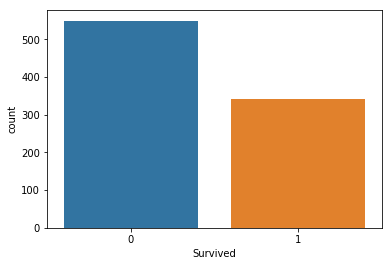

In [4]:
sns.countplot(x='Survived', data=train)

In [24]:
import re
def get_title(name): 
    return re.split(r"\,|\.", name)[1]
train['Title'] = train['Name'].apply(get_title)
train['Sex'] = train['Sex'].map({ 'female': 0, 'male': 1})

In [25]:
train.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class,Title
886,887,0,2,"Montvila, Rev. Juozas",NaN,27.0,0,0,211536,13.00,NaN,S,NaN,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",NaN,19.0,0,0,112053,30.00,B42,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",NaN,26.0,0,0,111369,30.00,C148,C,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",NaN,32.0,0,0,370376,7.75,NaN,Q,NaN,Mr


In [6]:
def get_class(cabin):
    return cabin if cabin is np.NaN else cabin[:1]
train['Class'] = train['Cabin'].apply(get_class)

In [ ]:
train.tail()

In [ ]:
survived_by_class = train.groupby(['Class', 'Survived']).size()
survived_by_class.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [10]:
sns.heatmap(train.dropna())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''